In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
result = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TCC/tweets_sentiment_historical/df_sentiment_price/oil_sentiment_price.csv', sep=";",  index_col=False)

In [0]:
result = result.drop(['Unnamed: 0'], 1)


In [6]:
result = result.apply(lambda x: x.str.replace(',','.'))
result

,date,variation,VADER score
0,14/08/2019 09:31,-0.6603,-0.5574
1,14/08/2019 09:31,-0.6603,-0.8126
2,14/08/2019 09:31,-0.6603,-0.5574
3,14/08/2019 09:31,-0.6603,-0.8126
4,14/08/2019 09:31,-0.6603,-0.8260
5,14/08/2019 10:34,-0.5900,-0.7615
6,15/08/2019 09:31,-0.1881,-0.4767
7,15/08/2019 12:31,-0.4108,-0.5719
8,16/08/2019 09:31,-0.2239,-0.6808
9,16/08/2019 09:31,-0.2239,-0.5719


In [7]:
result['variation'] = result['variation'].astype(float)
result.head()

,date,variation,VADER score
0,14/08/2019 09:31,-0.6603,-0.5574
1,14/08/2019 09:31,-0.6603,-0.8126
2,14/08/2019 09:31,-0.6603,-0.5574
3,14/08/2019 09:31,-0.6603,-0.8126
4,14/08/2019 09:31,-0.6603,-0.8260


In [0]:
result = result[result.variation <= 2]

In [0]:
variation = result.iloc[:,1:2].values
sentiment = result.iloc[:,2:3].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(variation, sentiment, test_size=0.33, random_state=42)

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.00545616]
[[0.72766013]]


In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3833063988475791
Mean Squared Error: 0.17406471914591423
Root Mean Squared Error: 0.4172106412184548


In [0]:
price = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TCC/Intraday_Historical/PBR.csv')

TypeError: ignored

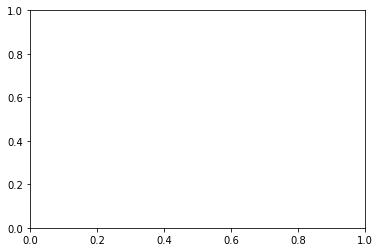

In [29]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train, '*', color = 'red')
#plt.plot(variation, sentiment, 'o')